In [82]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

In [101]:
df = pd.read_csv("MalariaAfricaDataset.csv")
display(df)

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,...,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
590,Tunisia,2017,TUN,NaN,NaN,NaN,NaN,NaN,92.66,NaN,...,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
591,Uganda,2017,UGA,336.76,11667831.0,NaN,NaN,NaN,7.07,4.46,...,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)
592,Zambia,2017,ZMB,160.05,5505639.0,NaN,NaN,NaN,NaN,NaN,...,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332)


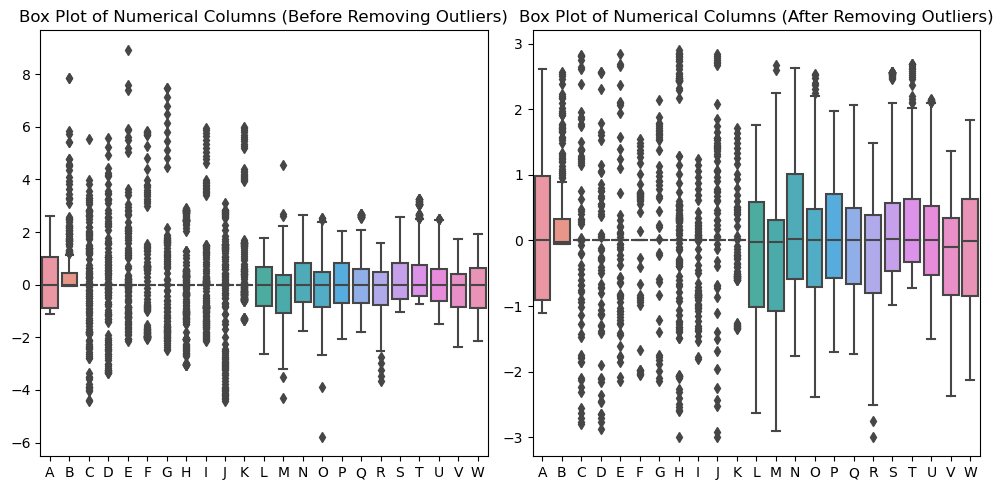

,country,year,code,X,A,B,C,D,E,F,...,N,O,P,Q,R,S,T,U,V,W
0,Algeria,2007,DZA,POINT (28.033886 1.659626),-1.11358,-0.05318,0.00000,0.0000,0.00000,0.0,...,1.32203,-0.70393,1.58231,1.91564,1.02991,2.03566,2.46771,2.15443,1.35792,-0.84584
1,Angola,2007,AGO,POINT (-11.202692 17.873887),0.71330,0.66855,-2.62789,0.0585,-1.85723,0.0,...,0.88691,0.88336,-0.96009,-1.44316,-2.15555,0.17971,-0.20442,0.45765,-1.14469,-0.03680
2,Benin,2007,BEN,POINT (9.307689999999999 2.315834),1.94638,-0.05320,0.00000,0.0000,0.00000,0.0,...,0.00000,0.24845,-0.04012,0.24274,-1.01010,-0.79276,-0.61666,-1.04892,0.16352,-0.81310
3,Botswana,2007,BWA,POINT (-22.328474 24.684866),-1.10708,-0.05301,0.00000,0.0000,0.00000,0.0,...,0.90969,0.73844,0.83855,0.38778,0.98260,1.10941,0.89899,1.53123,-1.85432,0.30305
4,Burkina Faso,2007,BFA,POINT (12.238333 -1.561593),2.09650,-0.03237,0.00000,0.0000,0.00000,0.0,...,-1.03139,1.50448,-0.70945,-0.28712,-1.02001,-0.64762,-0.52793,0.08430,0.35044,-1.00657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,POINT (8.619543 0.824782),0.00000,0.00000,0.00000,0.0000,0.00000,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
590,Tunisia,2017,TUN,POINT (33.886917 9.537499),0.00000,0.00000,0.00000,0.0000,0.00000,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
591,Uganda,2017,UGA,POINT (1.373333 32.290275),0.00000,0.00000,0.00000,0.0000,0.00000,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
592,Zambia,2017,ZMB,POINT (-13.133897 27.849332),-0.09383,2.53807,0.00000,0.0000,0.00000,0.0,...,0.07891,0.33126,-0.26226,-0.45922,-0.17165,-0.23624,0.00488,-0.39707,-1.26787,0.46095


Percentage of missing values:
country    0.0
year       0.0
code       0.0
X          0.0
A          0.0
B          0.0
C          0.0
D          0.0
E          0.0
F          0.0
G          0.0
H          0.0
I          0.0
J          0.0
K          0.0
L          0.0
M          0.0
N          0.0
O          0.0
P          0.0
Q          0.0
R          0.0
S          0.0
T          0.0
U          0.0
V          0.0
W          0.0
dtype: float64

Number of blanks:
country    0
year       0
code       0
X          0
A          0
B          0
C          0
D          0
E          0
F          0
G          0
H          0
I          0
J          0
K          0
L          0
M          0
N          0
O          0
P          0
Q          0
R          0
S          0
T          0
U          0
V          0
W          0
dtype: int64


In [99]:
# Step 1: Load the data and perform previous steps
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("MalariaAfricaDataset.csv")
df.columns = ["country", "year", "code" ,"A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V", "W","X"]
numeric_values = df.drop(["country", "year", "code", "X"], axis=1)
median = numeric_values.median()
df1 = numeric_values.fillna(median)

# Step 2: Normalize the data frame using the same approach you mentioned
df1 = df1.apply(lambda iterator: ((iterator - iterator.median()) / iterator.std()).round(5))

# Step 3: Identify and remove outliers using Z-score
z_scores = df1.apply(lambda x: (x - x.median()) / x.std())  # Calculate Z-scores for each column
threshold = 3  # Define the Z-score threshold to identify outliers (you can adjust this value as needed)

# Filter rows where any value's absolute Z-score is greater than the threshold
outliers_removed = df1[(z_scores.abs() < threshold).all(axis=1)]

# Step 4: Visualization to compare the box plot before and after removing outliers
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df1)
plt.title('Box Plot of Numerical Columns (Before Removing Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(data=outliers_removed)
plt.title('Box Plot of Numerical Columns (After Removing Outliers)')
plt.tight_layout()

plt.show()

# Step 5: Put back the non-numeric columns into the data frame
non_numeric = df[["country", "year", "code", "X"]]  # Correct column names here
df_combined = pd.concat([non_numeric, outliers_removed], axis=1)

# Fill null values with 0 in the df_combined DataFrame
df_combined = df_combined.fillna(0)

# Display the DataFrame with null values filled with 0
display(df_combined)

# Step 6: Determine percentage of missing values and number of blanks
total_rows = df_combined.shape[0]
missing_percentages = df_combined.isnull().sum() / total_rows * 100
number_of_blanks = df_combined.isnull().sum()

print("Percentage of missing values:")
print(missing_percentages)

print("\nNumber of blanks:")
print(number_of_blanks)


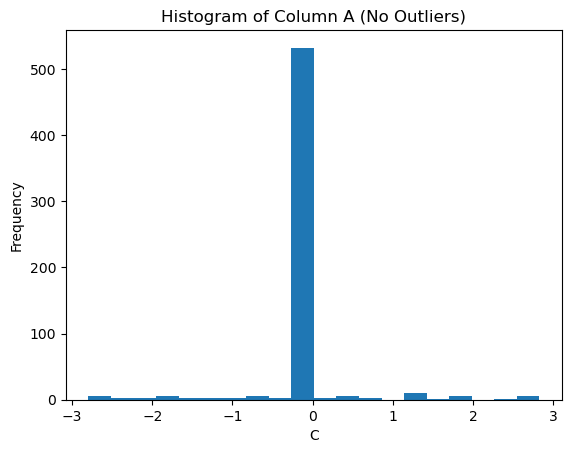

In [98]:
# Histogram for a numeric column
plt.hist(df_combined['C'], bins=20)
plt.xlabel('C')
plt.ylabel('Frequency')
plt.title('Histogram of Column A (No Outliers)')
plt.show()
